In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn import  metrics

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
df = pd.read_csv(r'abalone.csv')


In [ ]:
df=pd.read_table("C:\\Users\\Azad\\Downloads\\abalone.csv")

In [ ]:
df.head()

In [ ]:
df = pd.read_csv('C:\\Users\\Azad\\Downloads\\abalone.csv')
df

In [ ]:
df['age'] = df['Rings']+1.5
df.drop('Rings', axis = 1, inplace = True)

In [ ]:
df

1.looking at data

In [ ]:
df.head(5)

In [ ]:
df.tail(5)

In [ ]:
df.columns

In [ ]:
df.shape

2.convert multiple data type into single data type

In [ ]:
df.info()

In [ ]:
df.describe().T

In [16]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
age                 28
dtype: int64

In [17]:
df.duplicated().value_counts()

False    4177
dtype: int64

3.Handling missing values

In [18]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

Visualization

In [19]:
plt.style.use('seaborn-darkgrid')

1.Univariate analysis

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

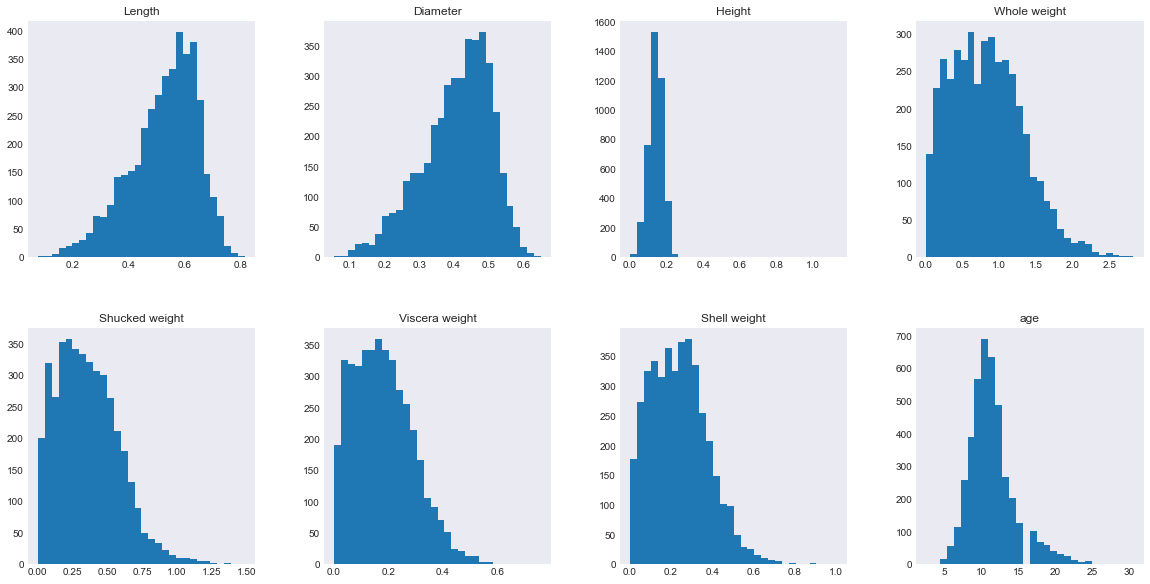

In [20]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [21]:
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

In [22]:
nf

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [23]:
cf

Index(['Sex'], dtype='object')

In [24]:
skew_values = skew(df[nf], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(nf), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


<AxesSubplot:xlabel='Sex', ylabel='count'>

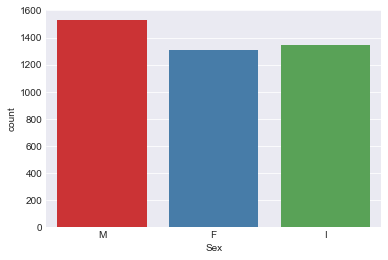

In [25]:
sns.countplot(x = 'Sex', data = df, palette="Set1")

In [26]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


2.Bivariate analysis

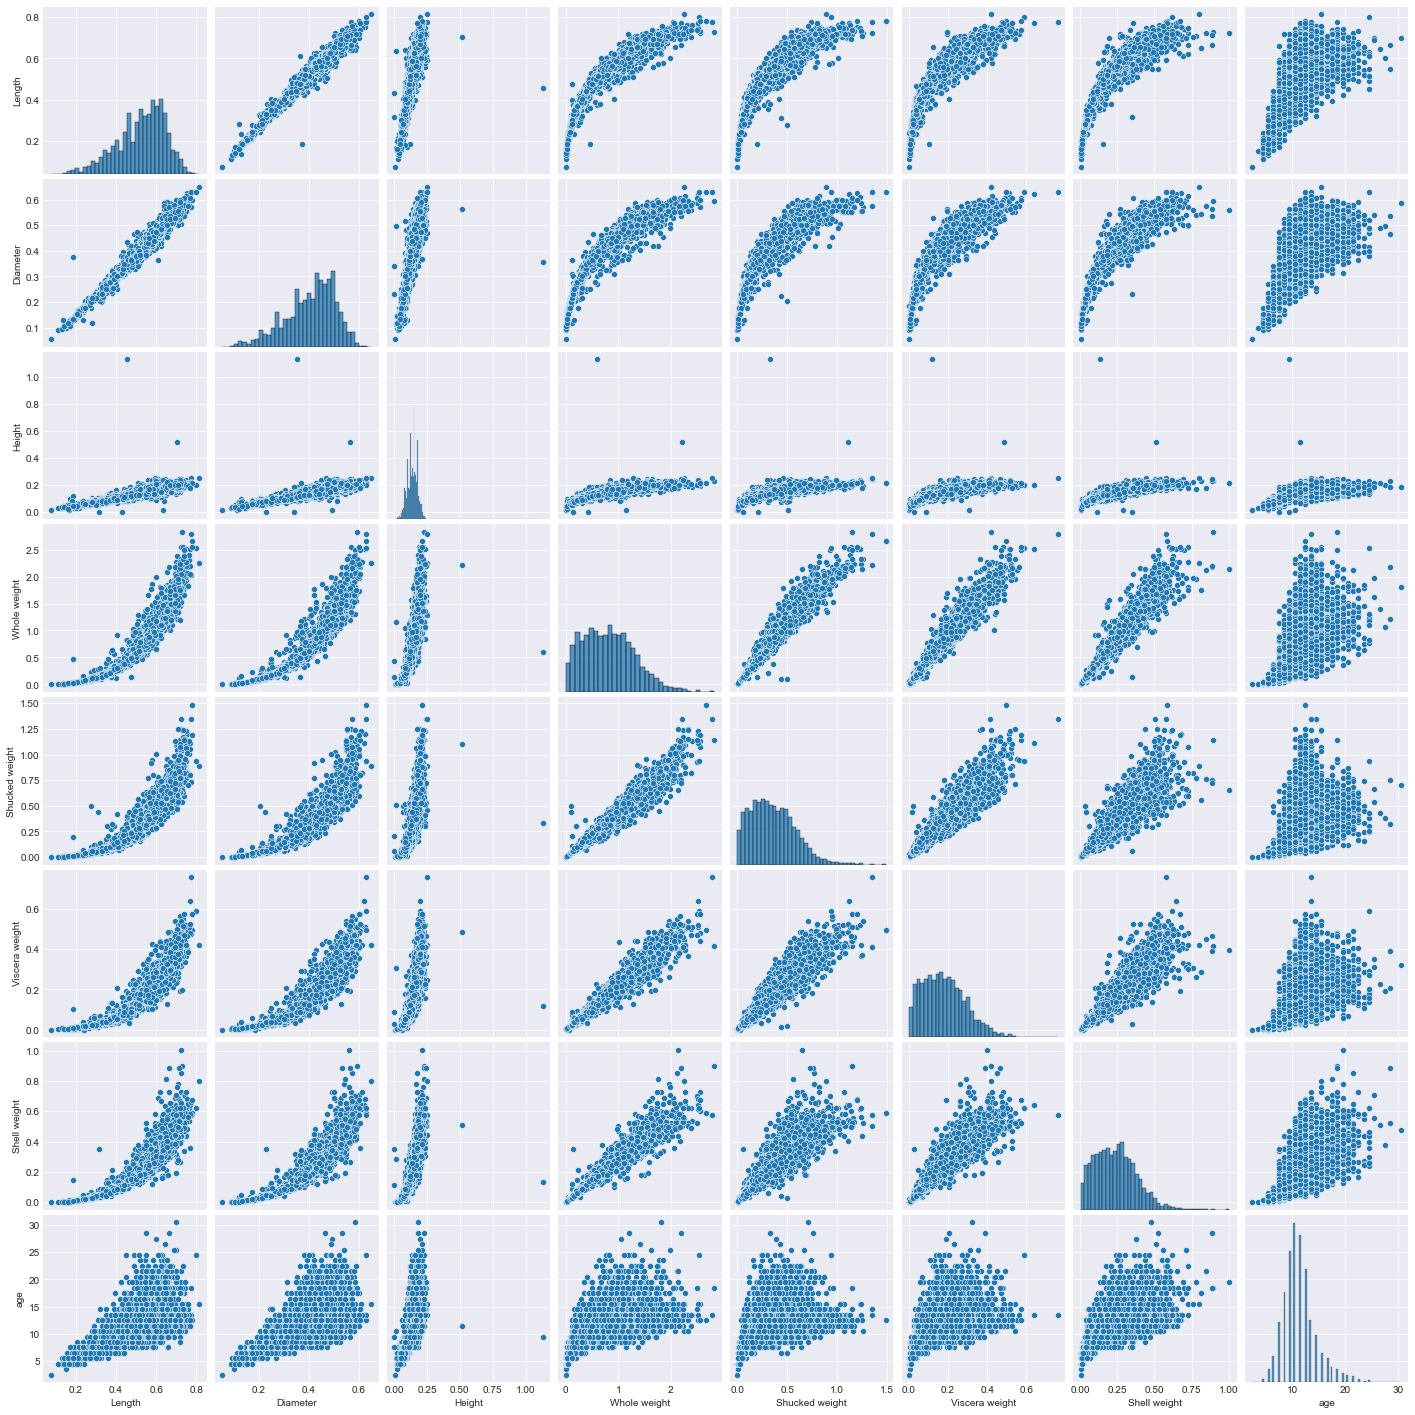

In [27]:
sns.pairplot(df[nf])

3.Multivaraite analysis

<AxesSubplot:>

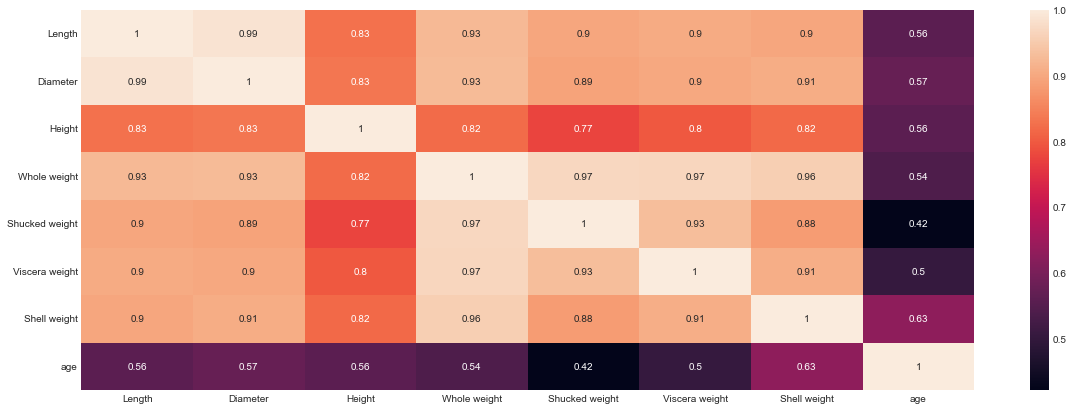

In [28]:
plt.figure(figsize=(20,7))
sns.heatmap(df[nf].corr(), annot=True)

Outliers

In [29]:
data = pd.get_dummies(df)
dummy_data = data.copy()

<AxesSubplot:>

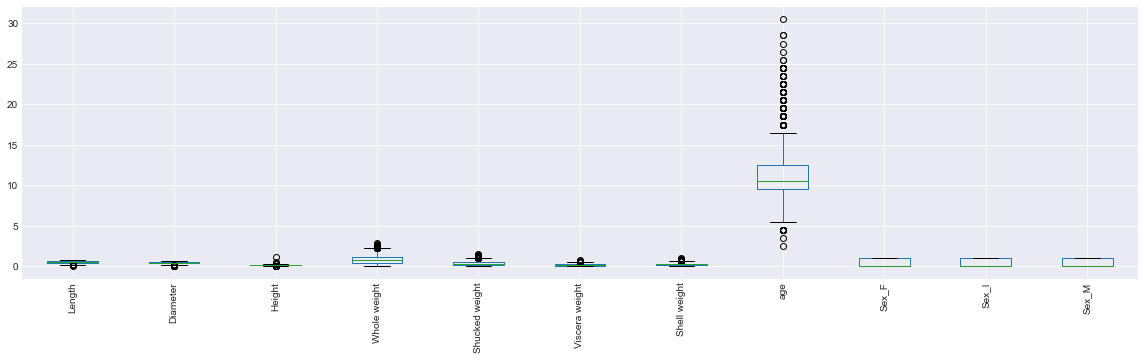

In [30]:
data.boxplot( rot = 90, figsize=(20,5))

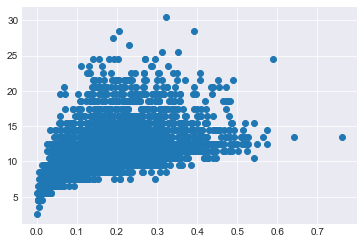

In [31]:
var = 'Viscera weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

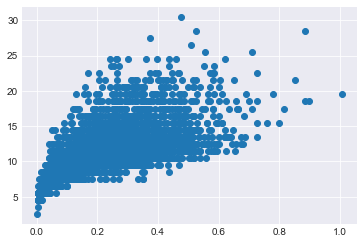

In [32]:
var = 'Shell weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

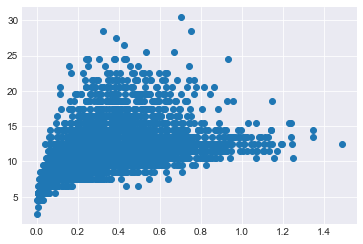

In [33]:
var = 'Shucked weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

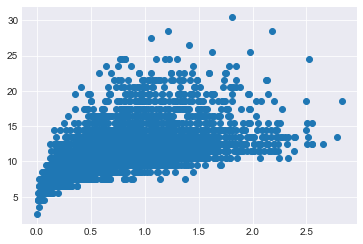

In [34]:
var = 'Whole weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

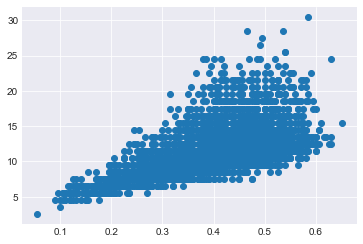

In [35]:
var = 'Diameter'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

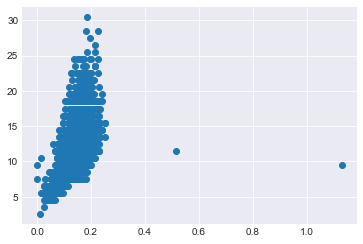

In [36]:
var = 'Height'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

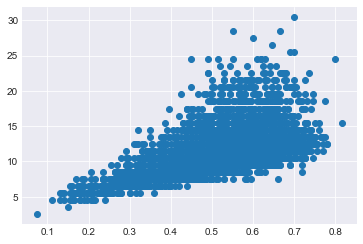

In [37]:
var = 'Length'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

Outliers removal

In [38]:
data.drop(data[(data['Viscera weight']> 0.5) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Viscera weight']<0.5) & (data['age'] > 25)].index, inplace=True)

data.drop(data[(data['Shell weight']> 0.6) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Shell weight']<0.8) & (data['age'] > 25)].index, inplace=True)

data.drop(data[(data['Shucked weight']>= 1) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Shucked weight']<1) & (data['age'] > 20)].index, inplace=True)

data.drop(data[(data['Whole weight']>= 2.5) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Whole weight']<2.5) & (data['age'] > 25)].index, inplace=True)

data.drop(data[(data['Diameter']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Diameter']<0.6) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Diameter']>=0.6) & (data['age']< 25)].index, inplace=True)

data.drop(data[(data['Height']>0.4) & (data['age'] < 15)].index, inplace=True)
data.drop(data[(data['Height']<0.4) & (data['age'] > 25)].index, inplace=True)

data.drop(data[(data['Length']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Length']<0.8) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Length']>=0.8) & (data['age']< 25)].index, inplace=True)

Pre-processing, Modelling and Evaluation
X and y split

In [39]:
X = data.drop('age', axis = 1)
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [40]:
y = data['age']
y.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: age, dtype: float64

Scale the independent variables

In [41]:
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

Train, Test and Split

In [42]:
train_X,val_X,train_y,val_y = train_test_split(X_new, y, test_size = 0.2, random_state = 42)

In [43]:
print("Shape of Training X :",train_X.shape)
print("Shape of Validation X :",val_X.shape)

Shape of Training X : (3196, 10)
Shape of Validation X : (799, 10)


In [44]:
print("Shape of Training y :",train_y.shape)
print("Shape of Validation y :",val_y.shape)

Shape of Training y : (3196,)
Shape of Validation y : (799,)


Model Building

1. Linear Regression

In [45]:
lr = LinearRegression()
lr.fit(train_X,train_y)

LinearRegression()

In [46]:
y_pred_val_lr = lr.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_lr))
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_lr))
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_lr)))
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lr))

MAE on Validation set : 1.4656318894340556
MSE on Validation set : 3.8989028634194276
RMSE on Validation set : 1.21063284666907
R2 Score on Validation set : 0.5295226039040829


2. MLP Regressor

In [47]:
mlp = MLPRegressor(max_iter = 300)
mlp.fit(train_X,train_y)

C:\Users\Azad\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=300)

In [48]:
y_pred_val_mlp = mlp.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_mlp))
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_mlp))
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_mlp)))
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_mlp))

MAE on Validation set : 1.4323934664950493
MSE on Validation set : 3.7488148302813356
RMSE on Validation set : 1.1968264145209402
R2 Score on Validation set : 0.5476336032004434


3. Gradient Boosting Regressor

In [49]:
gbc = GradientBoostingRegressor()
gbc.fit(train_X,train_y)

GradientBoostingRegressor()

In [50]:
y_pred_val_gbc = gbc.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_gbc))
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_gbc))
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_gbc)))
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_gbc))

MAE on Validation set : 1.3986684859899592
MSE on Validation set : 3.676948155723228
RMSE on Validation set : 1.182653155405235
R2 Score on Validation set : 0.5563056956060792


4. Support Vector Regressor

In [51]:
svm = SVR()
svm.fit(train_X,train_y)

SVR()

In [52]:
y_pred_val_svm = svm.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_svm))
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_svm))
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_svm)))
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_svm))

MAE on Validation set : 1.4405749928246252
MSE on Validation set : 4.105964898600535
RMSE on Validation set : 1.2002395564322255
R2 Score on Validation set : 0.5045365987239254


5. Decision Tree Regressor

In [53]:
dc = DecisionTreeRegressor(random_state = 0)
dc.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [54]:
y_pred_val_dc = dc.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_dc))
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_dc))
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_dc)))
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_dc))

MAE on Validation set : 2.0438047559449313
MSE on Validation set : 7.853566958698373
RMSE on Validation set : 1.4296169962423262
R2 Score on Validation set : 0.0523165459031707


6. Random Forest Regressor

In [55]:
rf = RandomForestRegressor()
rf.fit(train_X,train_y)

RandomForestRegressor()

In [56]:
y_pred_val_rf = rf.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_rf))
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_rf))
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_rf)))
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_rf))

MAE on Validation set : 1.4363204005006256
MSE on Validation set : 3.7543264080100123
RMSE on Validation set : 1.1984658528721732
R2 Score on Validation set : 0.5469685256570922


Overview of all Regression Models

In [57]:
print('Logistic Regression R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lr))
print('MLP Regressor R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_mlp))
print('Gradient Boosting R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_gbc))
print('SVR R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_svm))
print('Decision Tree Regressor R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_dc))
print('Random Forest Regressor R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_rf))

Logistic Regression R2 Score on Validation set : 0.5295226039040829
MLP Regressor R2 Score on Validation set : 0.5476336032004434
Gradient Boosting R2 Score on Validation set : 0.5563056956060792
SVR R2 Score on Validation set : 0.5045365987239254
Decision Tree Regressor R2 Score on Validation set : 0.0523165459031707
Random Forest Regressor R2 Score on Validation set : 0.5469685256570922


Top best three models are:-

1. MLP Regressor: 0.5574528065241318
2. Gradient Boosting: 0.5561376032081178
3. Random Forest Regressor: 0.5465643065710539